In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/Airlines+Data.xlsx'
df = pd.read_excel(path)
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df.shape

(96, 2)

In [5]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Data Visualization

## Lineplot

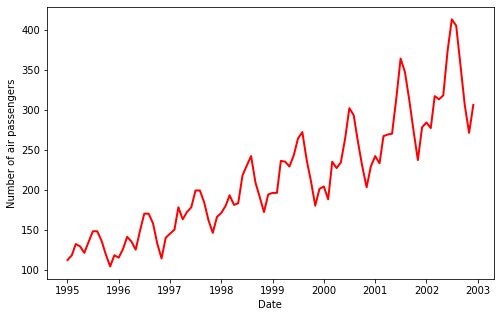

In [8]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
plt.plot(df['Passengers'], color = 'red', linewidth=2)

## Histogram

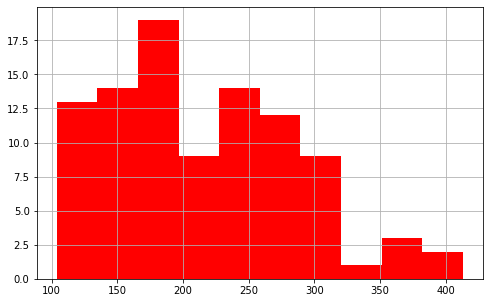

In [9]:
# Histogram
ax = plt.axes()
df['Passengers'].hist(figsize=(8,5), color = 'red')

## Density plot

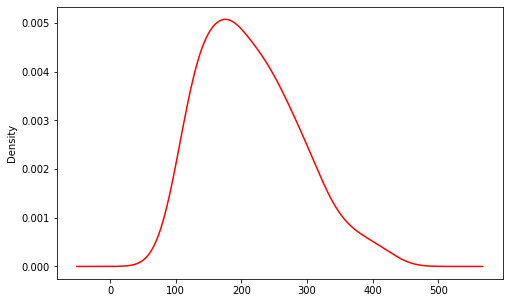

In [10]:
# Density Plot
ax = plt.axes()
df['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

## Lagplot

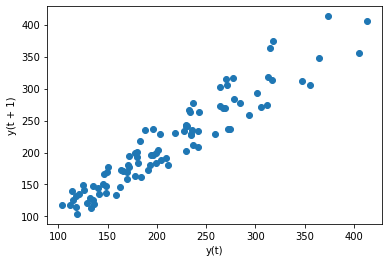

In [11]:
# Lagplot
from pandas.plotting import lag_plot

lag_plot(df['Passengers'])
ax = plt.axes()
plt.show()

## ACF and PACF plots

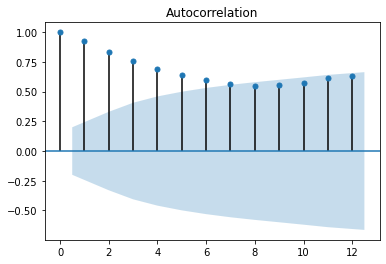

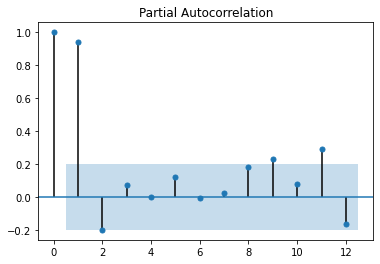

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
ax = plt.axes()
tsa_plots.plot_pacf(df.Passengers,lags=12)
ax = plt.axes()
plt.show()

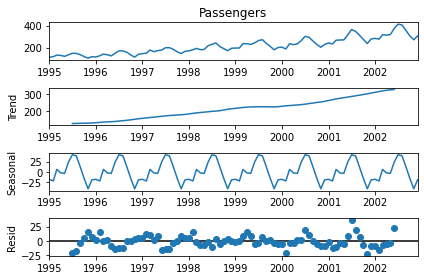

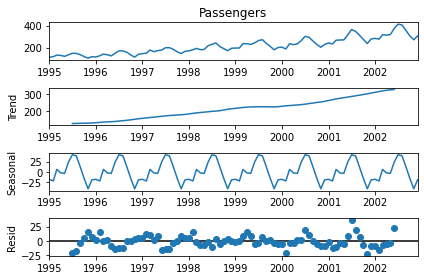

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(df.Passengers)
decompose_ts.plot()

# Data Splitting

In [14]:
Train = df.head(84)
Test = df.tail(12)

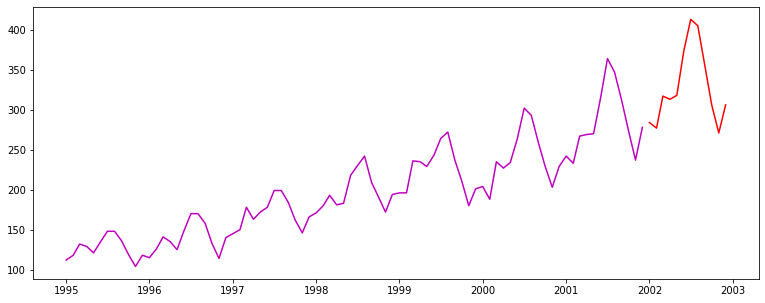

In [15]:
_,ax = plt.subplots(figsize = (13,5))
ax.plot(Train, color = 'm')
ax.plot(Test, color = 'red')

# Modelling

## Defining an evaluation criteria

In [16]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

## 1. Simple Exponential Method

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers, pred_ses)
rmse_ses_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


68.00674031349753

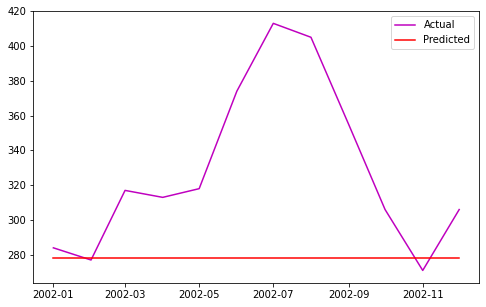

In [85]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_ses, color = 'r', label = 'Predicted')
plt.legend()

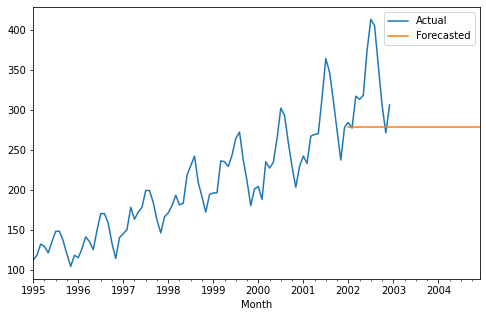

In [86]:
forecast = ses_model.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 2. Holt Method with additive trend

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(Train["Passengers"], trend = 'add').fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


58.579629290255895

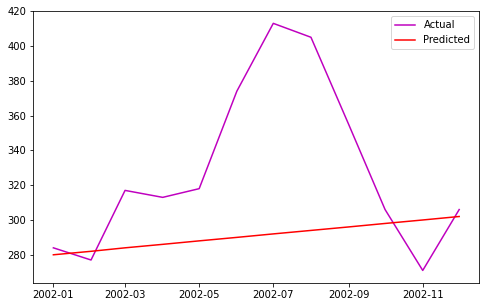

In [84]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw, color = 'r', label = 'Predicted')
plt.legend()

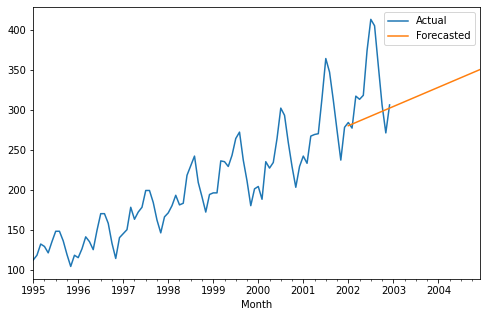

In [83]:
forecast = hw_model.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 3. Holt Method with Multiplicative trend

In [19]:
hw_model_mul = ExponentialSmoothing(Train["Passengers"], trend = 'mul').fit()
pred_hw_mul = hw_model_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_mul = RMSE(Test.Passengers, pred_hw_mul)
rmse_hw_model_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


62.523210446901544

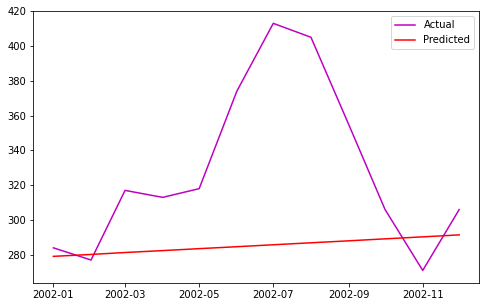

In [81]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw_mul, color = 'r', label = 'Predicted')
plt.legend()

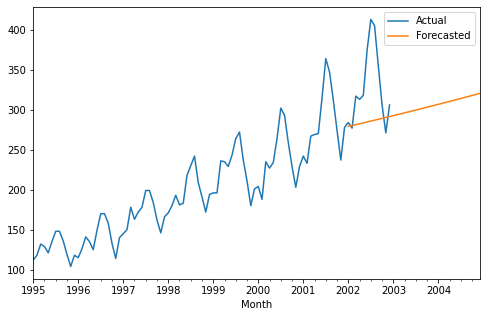

In [82]:
forecast = hw_model_mul.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 4. Holt-Winters method with additive trend and seasonality

In [20]:
hw_model_add_add = ExponentialSmoothing(Train["Passengers"], trend = 'add', seasonal='add').fit()
pred_hw_add_add = hw_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_add_add = RMSE(Test.Passengers, pred_hw_add_add)
rmse_hw_model_add_add

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


28.82343381194216

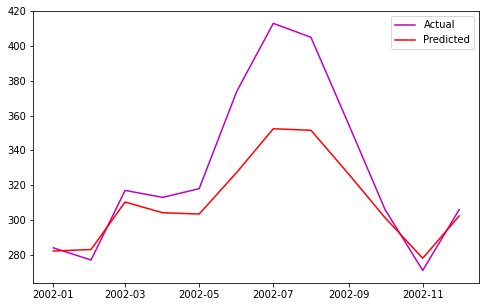

In [80]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw_add_add, color = 'r', label = 'Predicted')
plt.legend()

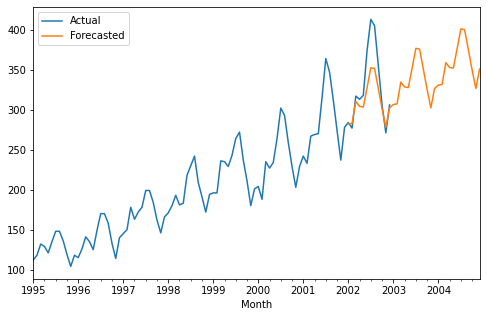

In [79]:
forecast = hw_model_add_add.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 5. Holt-Winters method with Multiplicative trend and additive seasonality

In [21]:
hw_model_mul_add = ExponentialSmoothing(Train["Passengers"], trend = 'mul', seasonal='add').fit()
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_mul_add = RMSE(Test.Passengers, pred_hw_mul_add)
rmse_hw_model_mul_add

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


8.426263175607584

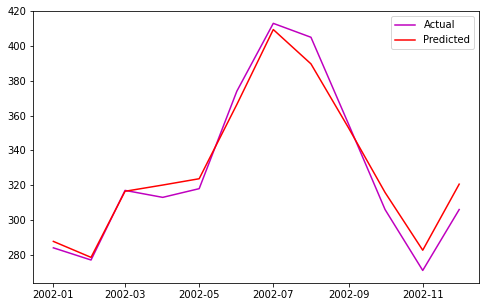

In [77]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw_mul_add, color = 'r', label = 'Predicted')
plt.legend()

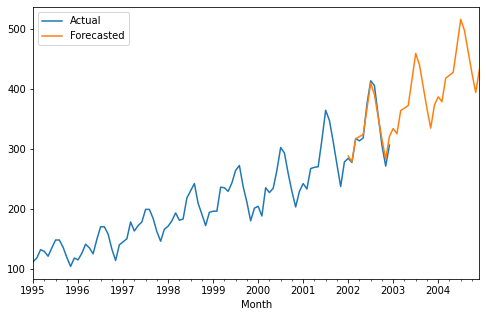

In [78]:
forecast = hw_model_mul_add.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 6. Holt-Winters method with additive trend and Multiplicative seasonality

In [22]:
hw_model_add_mul = ExponentialSmoothing(Train["Passengers"], trend = 'add', seasonal='mul').fit()
pred_hw_add_mul = hw_model_add_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_add_mul = RMSE(Test.Passengers, pred_hw_add_mul)
rmse_hw_model_add_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


12.920700425462785

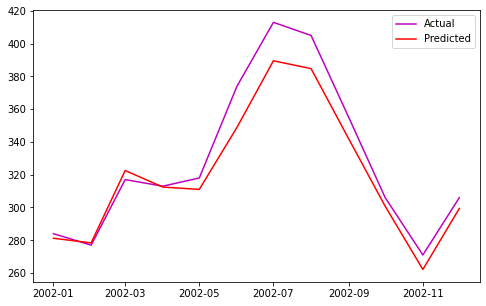

In [75]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw_add_mul, color = 'r',label = 'Predicted')
plt.legend()

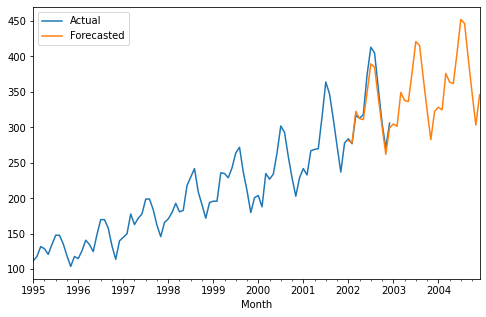

In [76]:
forecast = hw_model_add_mul.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 7. Holt-Winters method with Multiplicative trend and Multiplicative seasonality

In [23]:
hw_model_mul_mul = ExponentialSmoothing(Train["Passengers"], trend = 'mul', seasonal='mul').fit()
pred_hw_mul_mul = hw_model_mul_mul.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model_mul_mul = RMSE(Test.Passengers, pred_hw_mul_mul)
rmse_hw_model_mul_mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7.757110662631653

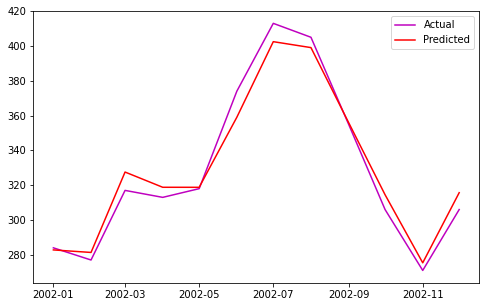

In [67]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'Actual')
ax.plot(pred_hw_mul_mul, color = 'r', label = 'Predicted')
plt.legend()

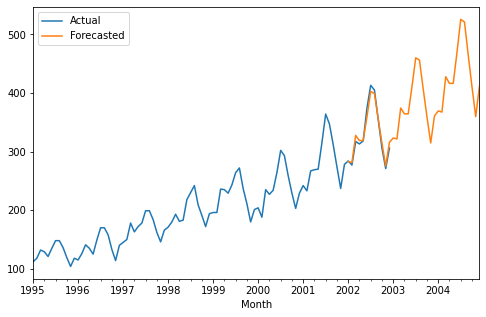

In [74]:
forecast = hw_model_mul_mul.forecast(steps = 36)
plt.figure(figsize = (8,5))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## 8. ARIMA model

### Finding best ARIMA values

In [24]:
! pip install pmdarima

In [25]:
from pmdarima import auto_arima # for determining ARIMA orders

In [34]:
stepwise_fit = auto_arima(df['Passengers'], start_p=0, start_q=0,
                          max_p=3, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=871.345, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=867.283, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=863.757, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=870.076, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=862.193, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=861.773, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=860.702, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=862.251, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=855.919, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=860.821, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=856.719, Time=0.15 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:               SARIMAX(3, 1, 2)   Log Likelihood                -421.170
Date:                Mon, 27 Sep 2021   AIC                            854.341
Time:                        12:17:23   BIC                            869.664
Sample:                             0   HQIC                           860.533
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1526      0.142      1.071      0.284      -0.127       0.432
ar.L2          0.4062      0.144      2.815      0.005       0.123       0.689
ar.L3         -0.3167      0.121     -2.619      0.009      -0.554      -0.080
ma.L1          0.1470      0.121      1.215      0.224      -0.090       0.384
ma.L2         -0.7809      0.116     -6.734      0.000      -1.008      -0.554
sigma2       409.9286     75.390      5.437      0.000     262.167     557.690
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.41   Prob(JB):                         0.14
Heteroskedasticity (H):               3.63   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Fitting an ARIMA model with order = (3,1,2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train['Passengers'],order=(3,1,2))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   83
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -358.852
Method:                       css-mle   S.D. of innovations             17.563
Date:                Mon, 27 Sep 2021   AIC                            731.704
Time:                        12:17:50   BIC                            748.636
Sample:                    02-01-1995   HQIC                           738.506
                         - 12-01-2001                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2518      2.130      1.057      0.290      -1.923       6.426
ar.L1.D.Passengers     0.9960      0.119      8.372      0.000       0.763       1.229
ar.L2.D.Passengers    -0.9938      0.123     -8.109      0.000      -1.234      -0.754
ar.L3.D.Passengers     0.0036      0.120      0.030      0.976      -0.232       0.239
ma.L1.D.Passengers    -0.9038      0.050    -18.162      0.000      -1.001      -0.806
ma.L2.D.Passengers     1.0000      0.057     17.571      0.000       0.888       1.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5011           -0.8711j            1.0049           -0.1669
AR.2            0.5011           +0.8711j            1.0049            0.1669
AR.3          272.5714           -0.0000j          272.5714           -0.0000
MA.1            0.4519           -0.8921j            1.0000           -0.1754
MA.2            0.4519           +0.8921j            1.0000            0.1754
-----------------------------------------------------------------------------
"""

In [36]:
model_arima = model.fit()
pred_arima = model_arima.predict(start = Test.index[0],end = Test.index[-1], dynamic = False , typ = 'levels')
rmse_arima = RMSE(Test.Passengers, pred_arima)
rmse_arima

46.703182475700096

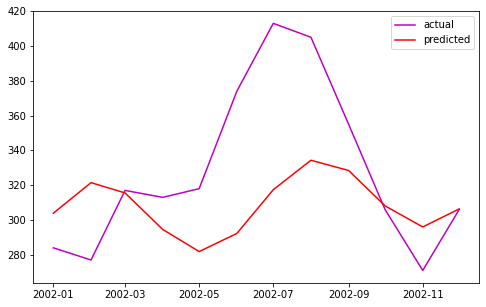

In [47]:
_,ax = plt.subplots(figsize = (8,5))
ax.plot(Test['Passengers'], color = 'm', label = 'actual')
ax.plot(pred_arima, color = 'r', label = 'predicted')
plt.legend()

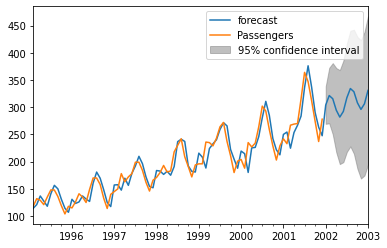

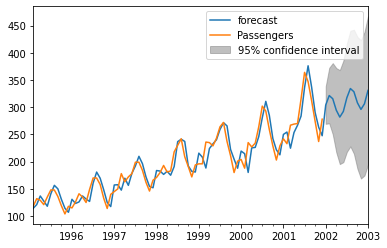

In [65]:
forecast_arima = model_arima.forecast(12)[0]
model_arima.plot_predict(1,96)

In [58]:
forecast_arima

array([303.92099441, 321.4557037 , 315.54730853, 294.56865724,
       281.84760176, 292.24348059, 317.40311038, 334.32354662,
       328.44880716, 308.11139566, 295.99335444, 306.35269166])

# Experimental Analysis

In [91]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method with Additive trend',rmse_hw_model], ['Holt method with Multiplicative trend',rmse_hw_model_mul],
          ['HW with Additive trend and seasonality',rmse_hw_model_add_add],['HW with Multiplicative Trend and Additive Seasonality', rmse_hw_model_mul_add],
        ['HW with Additive trend and Multiplicative seasonality', rmse_hw_model_add_mul],['HW with Multiplicative trend and Seasonality',rmse_hw_model_mul_mul], ['ARIMA Model', rmse_arima]]

In [92]:
evaluation_df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
evaluation_df

,Model,RMSE_Value
0,Simple Exponential Method,68.006740
1,Holt method with Additive trend,58.579629
2,Holt method with Multiplicative trend,62.523210
3,HW with Additive trend and seasonality,28.823434
4,HW with Multiplicative Trend and Additive Seas...,8.426263
5,HW with Additive trend and Multiplicative seas...,12.920700
6,HW with Multiplicative trend and Seasonality,7.757111
7,ARIMA Model,46.703182


#### Holt-Winters method was best fit for this dataset. <br> Lowest rmse value was observed with trend = 'mul' and seasonal = 'mul'

## Predicted Values with least rmse

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


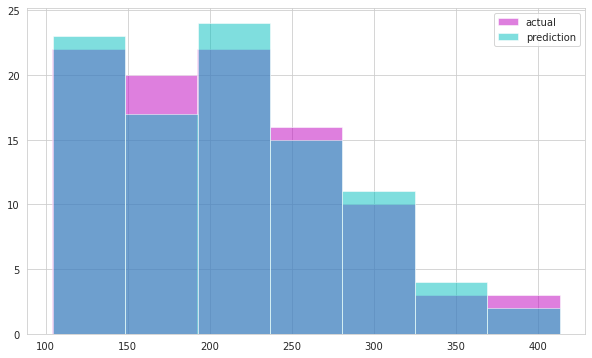

In [99]:
actual = df['Passengers']
hw_model_mul_mul = ExponentialSmoothing(df["Passengers"], trend = 'mul', seasonal='mul').fit()
pred_final= hw_model_mul_mul.predict(start = df.index[0], end = df.index[-1])

# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(actual, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.legend(loc = 'best')
plt.show()

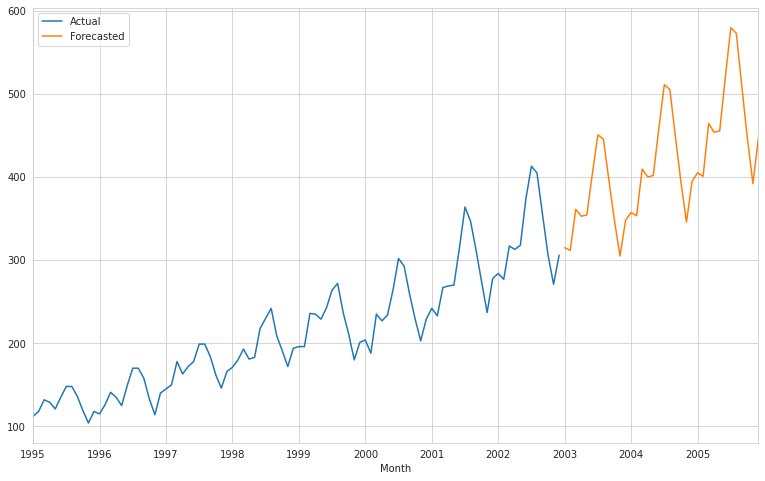

In [100]:
forecast = hw_model_mul_mul.forecast(steps = 36)
plt.figure(figsize = (13,8))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()

## Forecast plot for HW with Multiplicative trend and seasonality

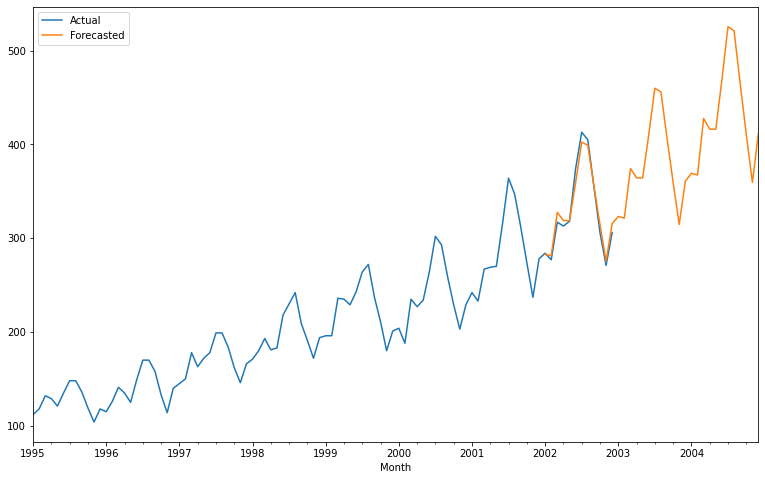

In [93]:
forecast = hw_model_mul_mul.forecast(steps = 36)
plt.figure(figsize = (13,8))
df['Passengers'].plot(label = 'Actual')
forecast.plot(label = 'Forecasted')
plt.legend()